Enhancing Food Delivery Services: A Predictive Model for Accurate Delivery Time Estimation

Python's Data Science and Analysis

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
# import the clean data to Python for some analysis
df = pd.read_csv(r'C:/Users/lusic/OneDrive/Documents/Food Times Delivery Predictions/Clean_Data_latest_updates.csv')
df.head()
# review the first few rows of clean data 

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Time_Delivery
0,7.93,Windy,Low,Afternoon,Scooter,12,1,43
1,16.42,Clear,Medium,Evening,Bike,20,2,84
2,9.52,Foggy,Low,Night,Scooter,28,1,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1,37
4,19.03,Clear,Low,Morning,Bike,16,5,68


In [5]:
df.shape

(970, 8)

In [6]:
df.info()
#checking the info of this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             970 non-null    float64
 1   Weather                 970 non-null    object 
 2   Traffic_Level           970 non-null    object 
 3   Time_of_Day             970 non-null    object 
 4   Vehicle_Type            970 non-null    object 
 5   Preparation_Time_min    970 non-null    int64  
 6   Courier_Experience_yrs  970 non-null    int64  
 7   Time_Delivery           970 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 60.8+ KB


In [7]:
df.columns = df.columns.str.strip().str.replace('"', '')
print(df.columns)
# Clean Column Names by removing any quotes and strip extra spaces

Index(['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Time_Delivery'],
      dtype='object')


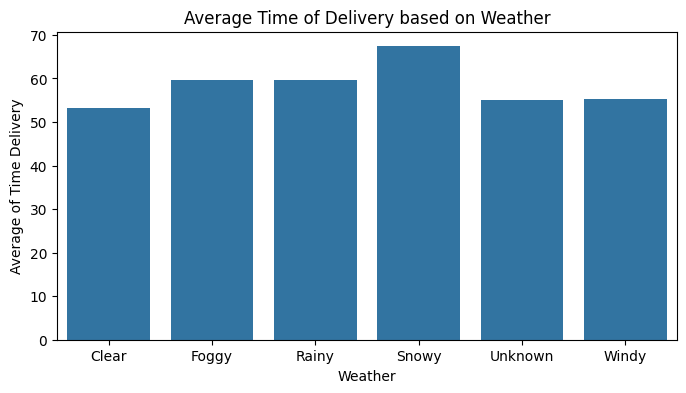

In [45]:
Weather_avg = df.groupby('Weather')['Time_Delivery'].mean().reset_index()
# For better data, going to average the Time Delivery based on Weather instead of actual Time Delivery based on Weather
plt.figure(figsize=(8,4))
sns.barplot(Weather_avg, x = 'Weather', y = 'Time_Delivery')
plt.title('Average Time of Delivery based on Weather')
plt.xlabel('Weather')
plt.ylabel('Average of Time Delivery')
plt.show()
# Bar Plot for Time Delivery vs Weather
# Will find out what type of weather are more prone to Time Delivery 

Snowy Weather has the highest average delivery time because of reduced visibility, road slippery, traffic congestion, difficult to reach location, or need extra precautions (drive slowly) could affect Delivery Time. Foggy and Rainy Weather is the second highest due to road slippery or reduced visibility that required more cautions while delivery as this could affect the delivery times. Clear weather is the lowesst average delivery time due to delivering smoothly.

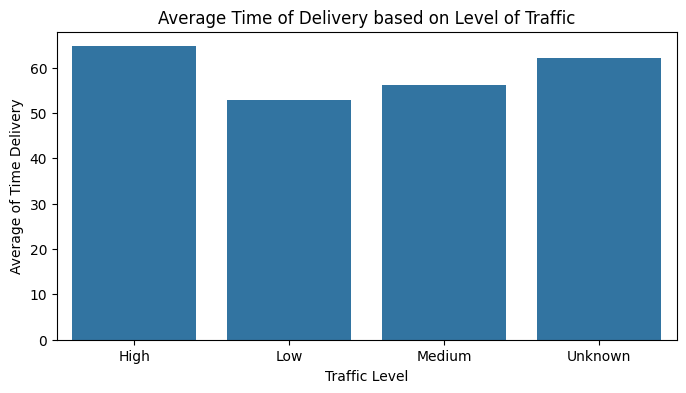

In [34]:
Traffic_avg = df.groupby('Traffic_Level')['Time_Delivery'].mean().reset_index()
# For better data, going to Average for Time of Delivery based on the level of Traffic
plt.figure(figsize=(8,4))
sns.barplot(Traffic_avg, x = 'Traffic_Level', y = 'Time_Delivery')
plt.title('Average Time of Delivery based on Level of Traffic')
plt.xlabel('Traffic Level')
plt.ylabel('Average of Time Delivery')
plt.show()
# Making the box plot of Time Delivery based on the level of traffic
# To show which traffic are more prone to Time Delviery. I guess high traffic is more prone to time delivery.

Based on the Box plot, High Traffic could increase the average Time of delivery because of rush hour, accidents, road closure, construction, or events that blocking the road. Low Traffic have less Time of Delivery becuase of going smoothly that could make delivery more easier and without disruption. 

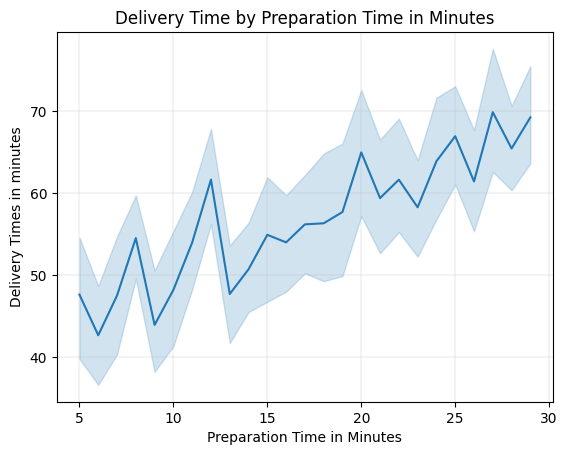

In [53]:
sns.lineplot(df, x = 'Preparation_Time_min', y = 'Time_Delivery')
plt.title('Delivery Time by Preparation Time in Minutes')
plt.xlabel('Preparation Time in Minutes')
plt.ylabel('Delivery Times in minutes')
plt.grid(linewidth = 0.2)
plt.show()
# Making the lineplot for Delivery Time by Preparation Time in Minutes.
# I guess need more extra time on preparation which could increase time of delivery.

If restaurants need more time to prepare for food for delivery, it may increase the delivery times. Like what happen if they prepared the meal for 30 minutes, it is more likely to complete delivery up to roughly 65 minutes. But, it does not mean they prepared 10 to 15 minutes and complete sooner, however, depending on the conditions, traffic levels, or the courier experience could affect delviery times if they prepared in less than 15 minutes.

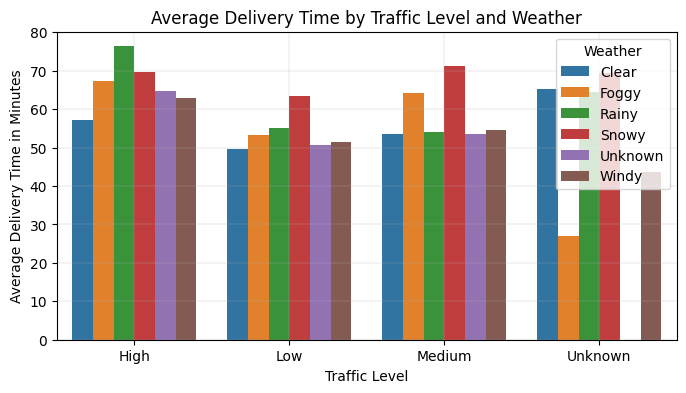

In [58]:
pivot = df.groupby(['Traffic_Level', 'Weather']) ['Time_Delivery'].mean().reset_index()
# Average the Time Delivery by Traffic Level and Weather for better data analysis
plt.figure(figsize=(8, 4))
sns.barplot(pivot, x = 'Traffic_Level', y = 'Time_Delivery', hue = 'Weather')
plt.title('Average Delivery Time by Traffic Level and Weather')
plt.xlabel('Traffic Level')
plt.ylabel('Average Delivery Time in Minutes')
plt.grid(linewidth = 0.2)
plt.show()
# Plan to make group bar plot for Weather and Traffic Level to show which one are more prone to Time Delivery

High Traffic: Rainy and snowy increases time delivery as showing as the highest bar.
Low Traffic: Snowy weather increases time delviery because of reduced visability or need extra precaution like driving slowly for the safety.
Medium Traffic: Rainy and snow takes longer delivery times.

There is unknown traffic because of missing or incomplete data based on traffic conditons. 

As the results, Weather is more likely to be prone to traffic because ofadverse conditions which can lead to risk of accidents, difficult to navigate on road, and cause congestion.

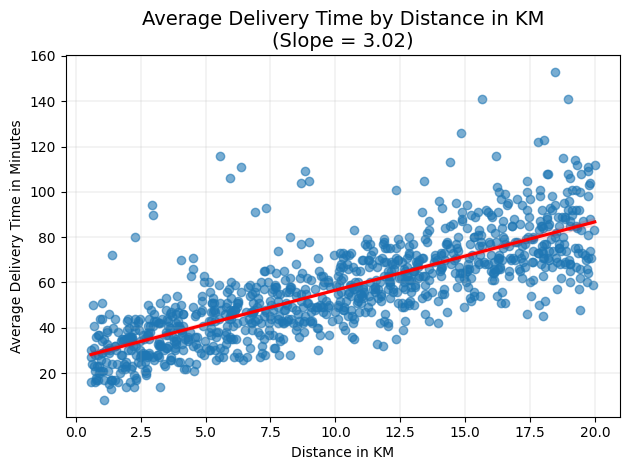

In [65]:
from scipy.stats import linregress
sns.regplot(df, x = 'Distance_km', y = 'Time_Delivery', scatter_kws={'alpha': 0.6}, line_kws={'color':'red'})
slope, intercept, r_value, p_value, std_err = linregress(df['Distance_km'], df['Time_Delivery'])
plt.title(f'Average Delivery Time by Distance in KM\n(Slope = {slope:.2f})', fontsize=14)
plt.xlabel('Distance in KM')
plt.ylabel('Average Delivery Time in Minutes')
plt.grid(linewidth = 0.2)
plt.tight_layout()
plt.show()
# Making a scatter plot with line of fitted for Average Delivery Time based on Distance

Based on the scatter with line of fitted, the slope is 3.02 so which is roughly every KM adds about 3 minutes to delviery. Longer distance could increase delivery times. But however, it spreads out because of traffic conditions, weather, or using detour route could affect the delivery times. Courier with more expereicne could spread for longer distance because of better at navigating complex routes and finding shortcuts while less experiences may stick to only standards routes or just follow the GPS.

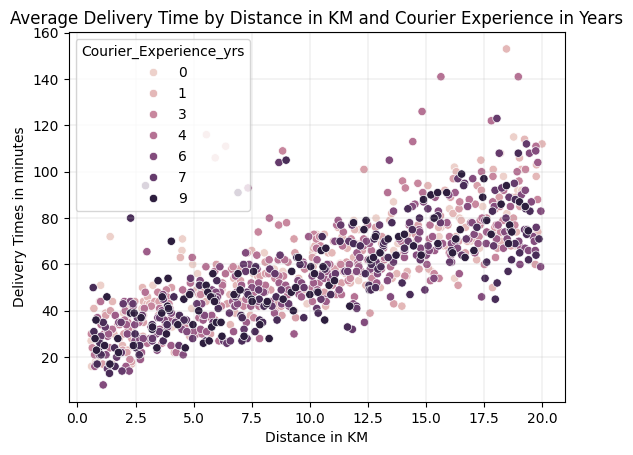

In [79]:
courier_experience = df.groupby(['Courier_Experience_yrs', 'Distance_km']) ['Time_Delivery'].mean().reset_index()
sns.scatterplot(courier_experience, x = 'Distance_km', y = 'Time_Delivery', hue = 'Courier_Experience_yrs')
plt.title('Average Delivery Time by Distance in KM and Courier Experience in Years')
plt.xlabel('Distance in KM')
plt.ylabel('Delivery Times in minutes')
plt.grid(linewidth = 0.2)
plt.show()
# Making a scatter plot to see how the courier experience spreads out in the time delivery based on distance in KM.

Courier Experience could spread out in longer distance. It may handle different types of routes like City, townm or countryside which can lead to different delivery times. Individual couriers can be vary because of efficiency speed or familiarity with specific routes. Longer distance likely to reduce the effect of experience due to physical constraints like limit of speeds.